# Importing required libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

#  Data understanding along with Data Cleansing and Transformations

In [4]:
# loading the data 
df=pd.read_csv("bank-additional-full.csv")
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


## Dealing with structure of the data : Semicolon-separated Values
- **Problem:** The data is not in comma-separated values (CSV) format; it is separated by semicolons.
- **Solution:** Specify the delimiter as a semicolon when using pandas to read the CSV file.

In [6]:
#Reading using delimiter
df=pd.read_csv("bank-additional-full.csv",delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Handling Duplicates 
- **Problem:** Are any Duplicate values in the dataset ?
- **Solution:** Use the **drop_duplicates** function, keeping the first occurrence, as the first instance may be needed.

In [9]:
#checking for duplicates i the dataset
print('Number of duplicates in the dataset are:',df.duplicated().sum())
print('Total number of Rows:', df.shape[0])
print('Total number of Columns:', df.shape[1])

Number of duplicates in the dataset are: 12
Total number of Rows: 41188
Total number of Columns: 21


In [10]:
# dropping duplicates by keeping first instance
df.drop_duplicates(keep = 'first',inplace=True)
print('Number of duplicates in the dataset are:',df.duplicated().sum())
print('Total number of Rows:', df.shape[0])
print('Total number of Columns:', df.shape[1])

Number of duplicates in the dataset are: 0
Total number of Rows: 41176
Total number of Columns: 21


## Dealing with Unknown values
- **Problem:** There are no null values (NaN) in the dataset, but some columns contain unknown or ambiguous values.
- **Solution:** Address these unknown values by using mean, mode, median, or model-based approaches. Alternatively, if the number of unknown values is small, consider dropping them.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
#lets see in which columns we have this unknown values
for i in df.columns:
   x=df[i].value_counts()
   if 'unknown' in x:
       print('The ',"\033[1m" 'unknown' "\033[0m" ,'values in', "\033[1m",i, "\033[0m",'column are :',"\033[1m",x['unknown'],"\033[0m")

The  unknown values in  job  column are :  330 
The  unknown values in  marital  column are :  80 
The  unknown values in  education  column are :  1730 
The  unknown values in  default  column are :  8596 
The  unknown values in  housing  column are :  990 
The  unknown values in  loan  column are :  990 


In [15]:
# lets see how much volume these unknown values weight in those specific columns.
for i in df.columns:
    x=(df[i] != 'unknown').sum()
    y=(df[i] == 'unknown').sum()
    if x and y > 1 :
        print("\033[1m",i.upper(), "\033[0m")
        print('known values :', x)
        print('Uknown values :', y)
        print('percentage of unknown in that specific column :',"\033[1m",((y/(x+y))*100).round(2),'%',"\033[0m")

 JOB 
known values : 40846
Uknown values : 330
percentage of unknown in that specific column :  0.8 % 
 MARITAL 
known values : 41096
Uknown values : 80
percentage of unknown in that specific column :  0.19 % 
 EDUCATION 
known values : 39446
Uknown values : 1730
percentage of unknown in that specific column :  4.2 % 
 DEFAULT 
known values : 32580
Uknown values : 8596
percentage of unknown in that specific column :  20.88 % 
 HOUSING 
known values : 40186
Uknown values : 990
percentage of unknown in that specific column :  2.4 % 
 LOAN 
known values : 40186
Uknown values : 990
percentage of unknown in that specific column :  2.4 % 


In [16]:
df[['job','marital','education','default','housing','loan']].dtypes

job          object
marital      object
education    object
default      object
housing      object
loan         object
dtype: object

#### We can see that **Job, Marital, Education, Default, Housing and loan** has unknown values.

### Dropping the values
**Solution:** Since the unknown values in the **job** and **marital** columns are minimal compared to the known values, we can **drop** these **unknown** values due to their small proportion.


In [19]:
# dropping unknown values in job and marital
# marital
indices_marital = df[df['marital'] == 'unknown'].index
print(len(indices_marital))
df.drop(indices_marital,inplace=True)

# job
indices_job = df[df['job'] == 'unknown'].index
print(len(indices_job))
df.drop(indices_job,inplace=True)

80
321


In [20]:
df.shape

(40775, 21)

### Mode Imputation
**Solution:** For the remaining unknown values, we use **mode imputation**. Since the data is simple and the columns in question are **categorical**, we opt for mode rather than mean or median, which are suited for numerical data. We are not using a model-based approach due to the simplicity of the dataset.

**Note**: Imputation methods such as filling with mean, median, or mode often rely on identifying NaN values. If unknown values are not replaced with NaN,these methods may not correctly identify or handle them, leading to inaccurate imputation.

In [22]:
# repacing default,housing,loan,education with mode

# Replace 'unknown' with NaN
df.replace('unknown', np.nan, inplace=True)

In [23]:
# Impute missing values for categorical columns with the mode

# Making the list of values that need to be imputing
imputing_columns = ['education','default','housing','loan']
for col in imputing_columns:
    # Calculating the mode (most frequent value) for the current column
    mode_value = df[col].mode()[0]
    # Filling the missing values (NaN) in the current column with the mode value
    df[col].fillna(mode_value, inplace=True)

In [24]:
# checking if their are any unknown values
for i in df.columns:
    x=(df[i] == 'unknown').sum()
    if x > 1:
        print('we have Unknown values in',i,':',y)
    else:
        print(i,'has no unknown values')

age has no unknown values
job has no unknown values
marital has no unknown values
education has no unknown values
default has no unknown values
housing has no unknown values
loan has no unknown values
contact has no unknown values
month has no unknown values
day_of_week has no unknown values
duration has no unknown values
campaign has no unknown values
pdays has no unknown values
previous has no unknown values
poutcome has no unknown values
emp.var.rate has no unknown values
cons.price.idx has no unknown values
cons.conf.idx has no unknown values
euribor3m has no unknown values
nr.employed has no unknown values
y has no unknown values


## Dealing with Outliers
- **Problem:** Are there outliers in the dataset? Outliers can be identified using various methods, such as visualizations and statistical techniques. We will focus on visualizations because they provide an easy and intuitive way to detect outliers without added complexity.
- **Solution:** To handle outliers, we can use approaches like Capping (Winsorization),Transformations(Log), Remove (Dropping).

### Identifying Outliers
Since our dataset contains both numeric and categorical data, we can use the following methods to identify outliers:
- **Boxplot**: Suitable for identifying outliers in numeric data.
- **Frequency Analysis**: Useful for detecting outliers in categorical data by observing unusual or rare categories.


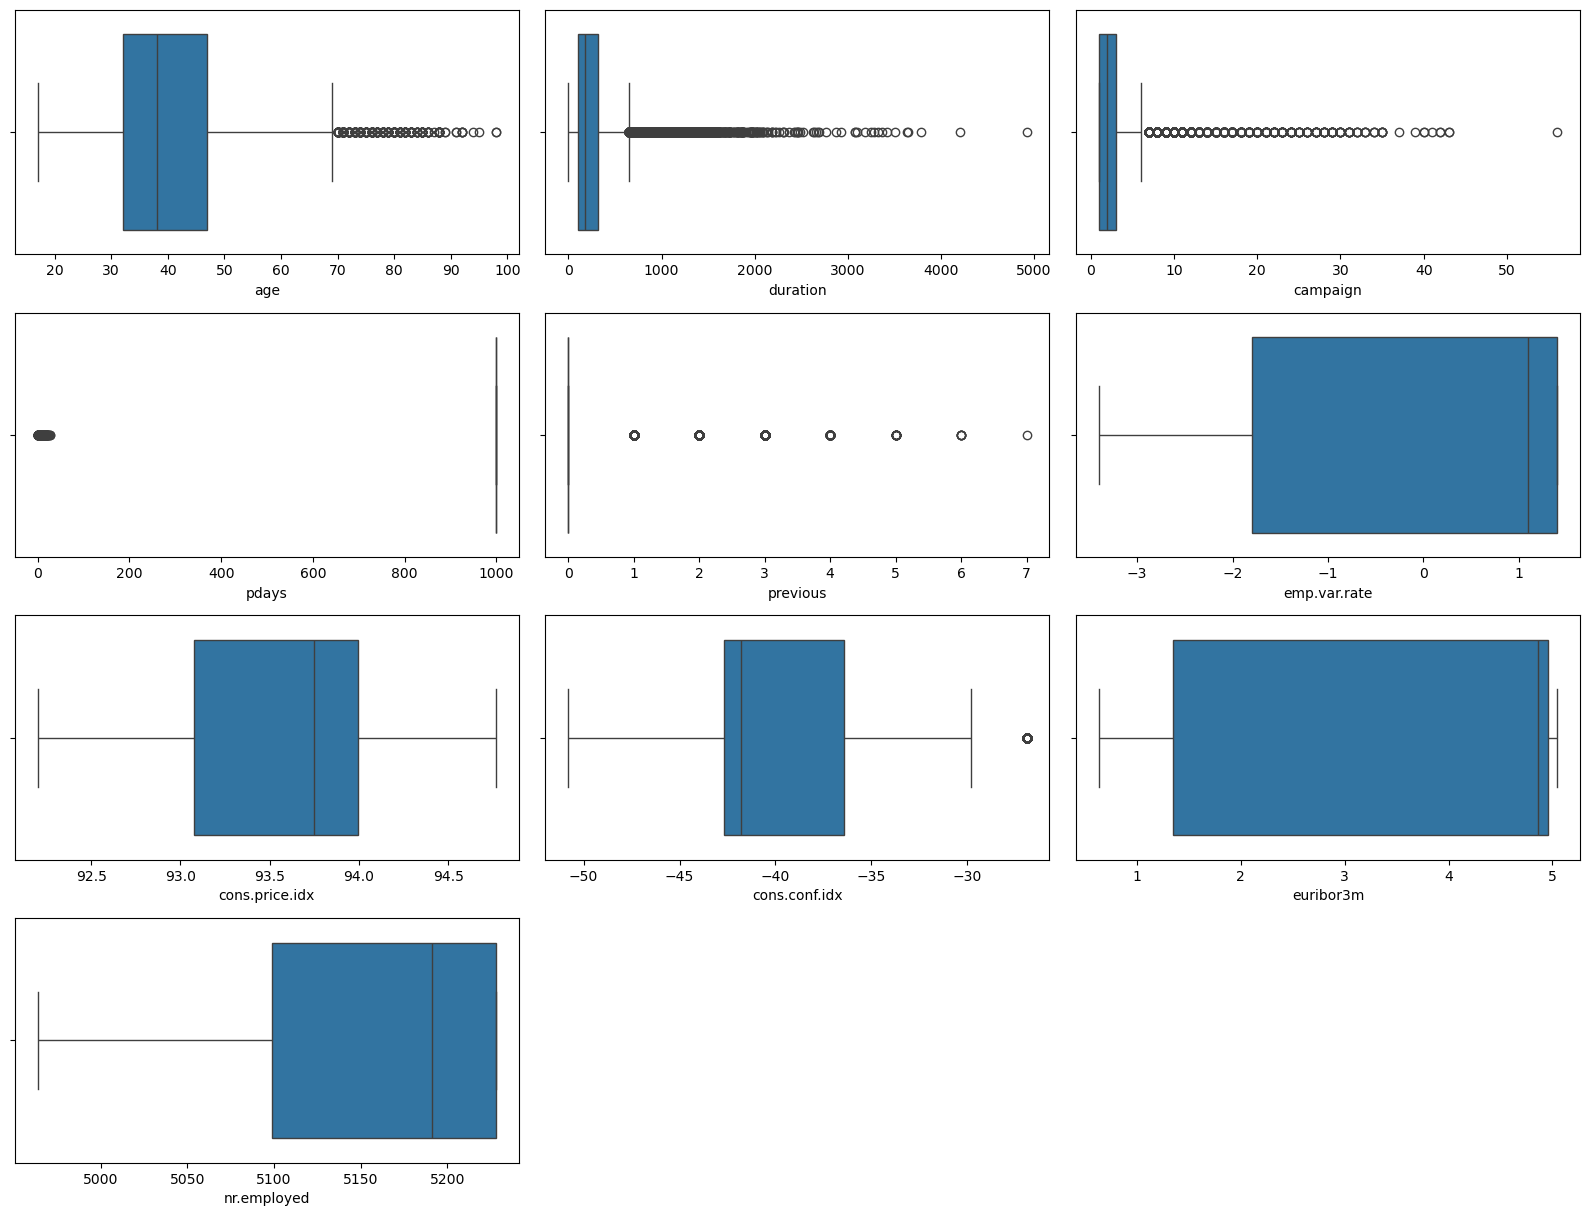

In [27]:
#Boxplots for numeric data

# Filtering  numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(16, 30))  

#plotting box plots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 3, i)
    sns.boxplot(x=df[column])
plt.tight_layout() 
plt.show()

In [28]:
#Value counts for categorical data
# Filtering  categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(df[column].value_counts())
    print("\n")

job
admin.           10405
blue-collar       9239
technician        6727
services          3961
management        2921
retired           1713
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
Name: count, dtype: int64


marital
married     24687
single      11490
divorced     4598
Name: count, dtype: int64


education
university.degree      13687
high.school             9461
basic.9y                6006
professional.course     5222
basic.4y                4118
basic.6y                2263
illiterate                18
Name: count, dtype: int64


default
no     40772
yes        3
Name: count, dtype: int64


housing
yes    22355
no     18420
Name: count, dtype: int64


loan
no     34592
yes     6183
Name: count, dtype: int64


contact
cellular     25919
telephone    14856
Name: count, dtype: int64


month
may    13617
jul     7113
aug     6106
jun     5245
nov     4086
apr     2619
oct      706
sep      562
mar      541
dec 

#### From the analysis above, we can conclude that there are **no** outliers in the **categorical data**.However, potential outliers are **present** in the **numeric data**, particularly in the **'age', 'duration', 'campaign', 'pdays', and 'previous'** columns.


#### Understanding the Outliers
Analyze the identified outliers to determine the most appropriate methods for handling them. This step is crucial for choosing the right approach, whether it be capping, transformation, or removal.

In [31]:
df[['age','duration','campaign','pdays','previous']].describe()

,age,duration,campaign,pdays,previous
count,40775.000000,40775.000000,40775.000000,40775.000000,40775.000000
mean,39.978541,258.360932,2.566401,962.714752,0.172925
std,10.401573,259.295917,2.768411,186.319804,0.494927
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


##### Age column
- As we can see, the age ranges from 17 to 98, which seems reasonable.Therefore, we don't need to treat outliers for age, and we won't drop any data points based on age.


##### Duration Column
- Since we are not considering 'duration' in our analysis, we can ignore outliers in this column.However, if you choose to include 'duration' later, please ensure to treat any outliers accordingly.


In [34]:
df['pdays'].value_counts()

pdays
999    39285
3        431
6        404
4        116
9         64
7         60
2         59
12        58
10        52
5         46
13        35
11        27
1         25
15        24
14        20
8         17
0         15
16        10
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

##### pdays Column
- As we can see, the value 999 appears in most of the rows, indicating that the client was not contacted previously.Removing these values doesn't make sense, so it's best to leave them as is.


In [36]:
df['previous'].value_counts() 

previous
0    35205
1     4522
2      740
3      214
4       70
5       18
6        5
7        1
Name: count, dtype: int64

##### Previous Column
- Although the numbers 4 to 7 appear rarely, we have included them in our analysis because they reflect valid client histories.Excluding these values might cause us to miss important details that could impact the success of our campaign.


In [38]:
df['campaign'].value_counts()

campaign
1     17444
2     10486
3      5294
4      2627
5      1586
6       966
7       622
8       394
9       277
10      222
11      176
12      124
13       89
14       69
17       57
16       50
15       49
18       31
20       30
19       26
21       23
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

##### Campaign Column
- For the 'campaign' column, we are applying capping (Winsorization) by limiting values to a maximum of 15. This helps in reducing the impact of extreme outliers.


In [40]:
df['campaign'] = np.clip(df['campaign'], a_min=None, a_max=15) # we can change the how many values we need based on outcome
df['campaign'].value_counts()

campaign
1     17444
2     10486
3      5294
4      2627
5      1586
6       966
7       622
15      399
8       394
9       277
10      222
11      176
12      124
13       89
14       69
Name: count, dtype: int64

In [41]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Dealing with imbalance of data 
- **Problem:** checking for imbalance data for target varibale
- **Solution:** To handle class imbalance, we can use resampling techniques like under 
sampling or oversampling, and evaluate model performance using metrics such as the F1
score

**Note:** Imbalance treatment is typically handled as part of the model training pipeline, not during initial data preprocessing.The main goal is to ensure that the model does not become biased toward the majority class, which is why these techniques are applied right before or during training.


In [43]:
#checking the imbalance using value counts
df['y'].value_counts(normalize=True)

y
no     0.887357
yes    0.112643
Name: proportion, dtype: float64

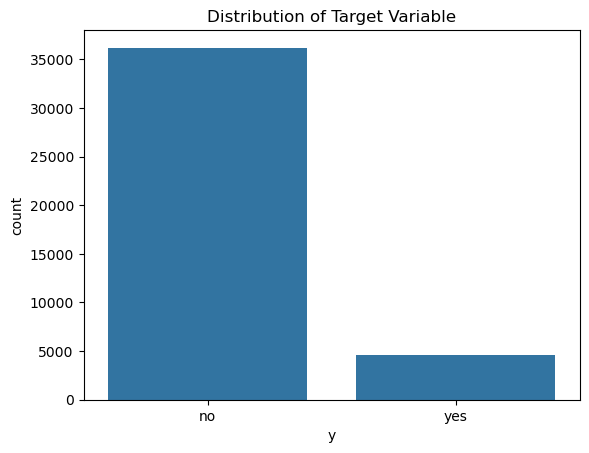

In [44]:
#plotting the counts graph 
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()

##### From above we can say that the target variable is imbalanced 

## Handling Skewness
- **Problem:** Just as with data imbalance, skewness in the data can affect model performance.
- **Solution:** Use transformations (e.g., log, square-root) or consider model sensitivity to skewness.

**Note:** Similar to imbalance treatment, we will address skewness only if it impacts model performance. Analyze the effect of skewness on the model outcome and apply transformations if necessary to improve results.



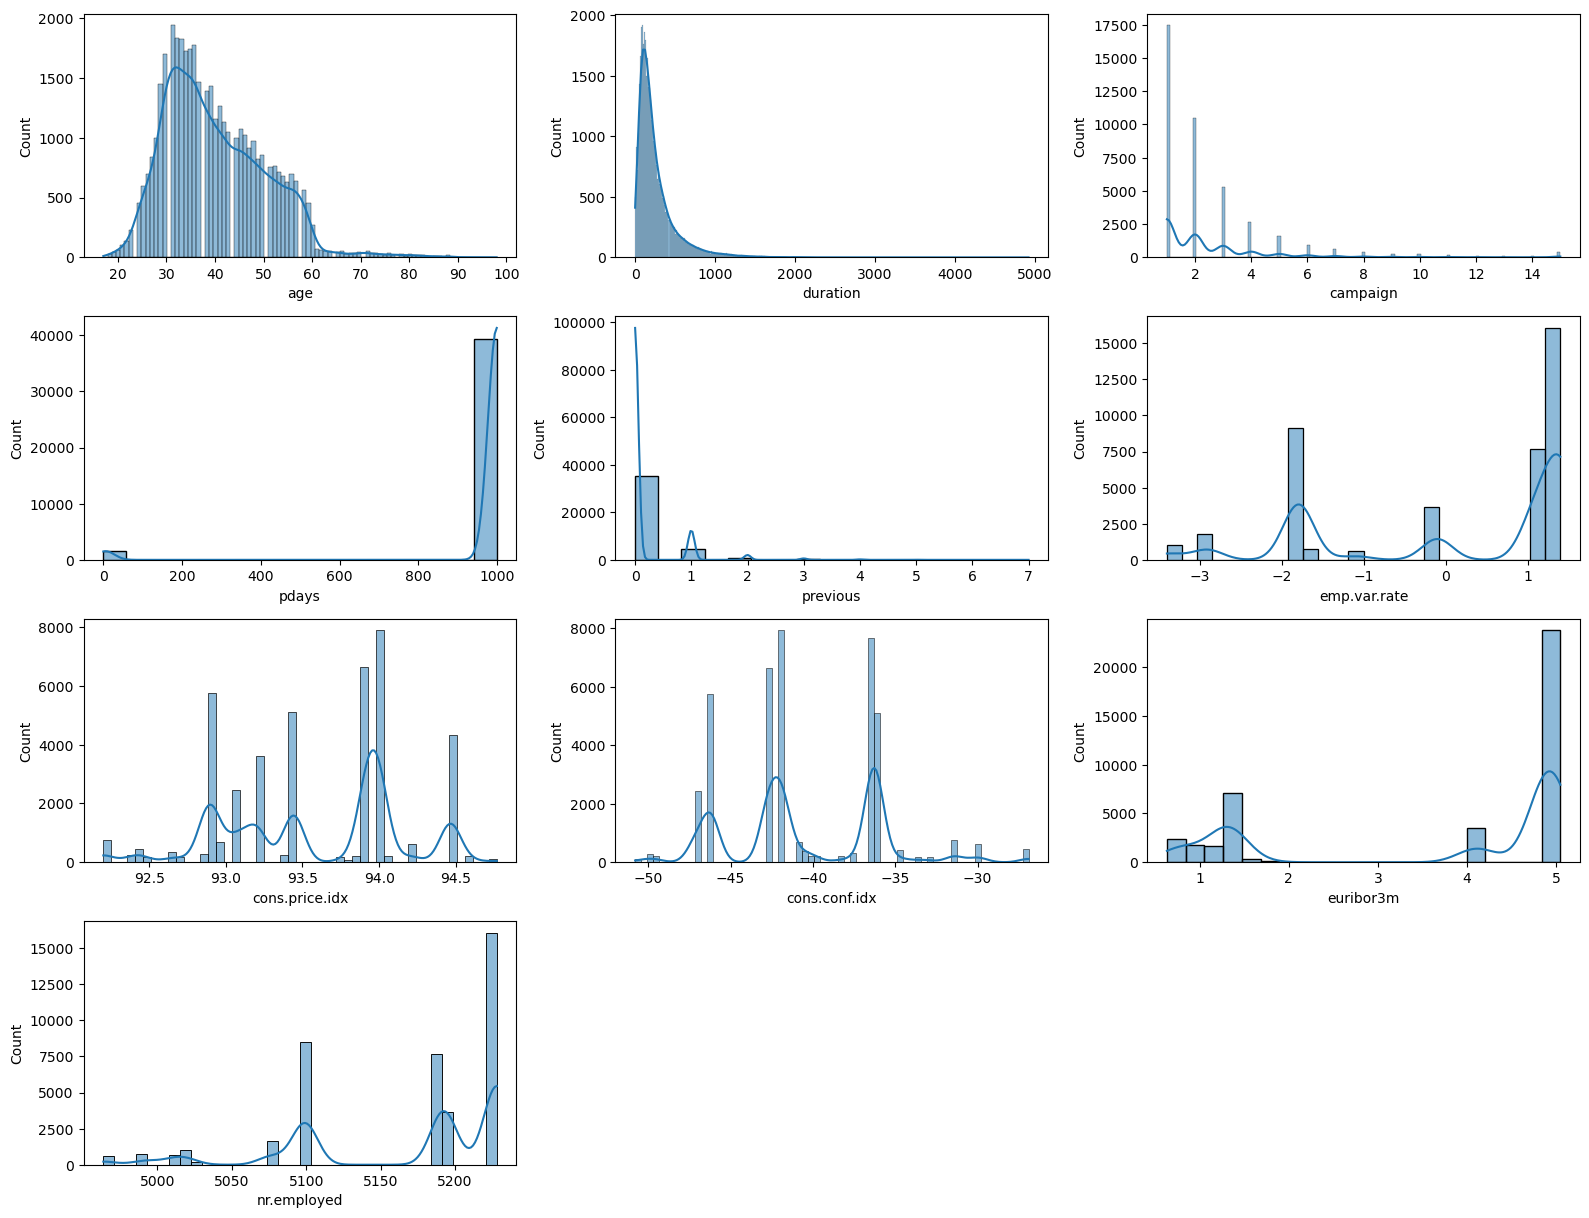

In [47]:
# Set up the figure for multiple boxplots
plt.figure(figsize=(16, 30))  # Adjust the figure size as needed

# Loop through the numeric columns and plot a boxplot for each
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 3, i)
    sns.histplot(df[column], kde=True)
    #plt.title(f"Histogram for '{column}'")
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [48]:
for i in numeric_columns:
    skewness = df[i].skew()
    if skewness > 0.5:
        print(i,f"{skewness:.2f} - Positive Skewness (Right-Skewed)")
    elif skewness < -0.5:
        print(i,f"{skewness:.2f} - Negative Skewness (Left-Skewed)")
    else:
        print(i,f"{skewness:.2f} - Approximately Symmetric")

age 0.79 - Positive Skewness (Right-Skewed)
duration 3.26 - Positive Skewness (Right-Skewed)
campaign 2.85 - Positive Skewness (Right-Skewed)
pdays -4.94 - Negative Skewness (Left-Skewed)
previous 3.84 - Positive Skewness (Right-Skewed)
emp.var.rate -0.72 - Negative Skewness (Left-Skewed)
cons.price.idx -0.23 - Approximately Symmetric
cons.conf.idx 0.31 - Approximately Symmetric
euribor3m -0.71 - Negative Skewness (Left-Skewed)
nr.employed -1.04 - Negative Skewness (Left-Skewed)


# EDA

### Pre-Checks
- Before proceeding, let's check for null values, duplicates, and data types once more and correct them if needed.

In [51]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [52]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [53]:
df.duplicated().sum()

2

In [54]:
df.drop_duplicates(keep = 'first',inplace=True)

In [55]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Conclusion: There are no null values or differing data types, but there were 2 duplicate values, which have been removed. Everything is good for now.

### Lets Explore Categorical Features

In [58]:
# all the categorical columns in this datset are:
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

#### Univariate Analysis for Categorical Features

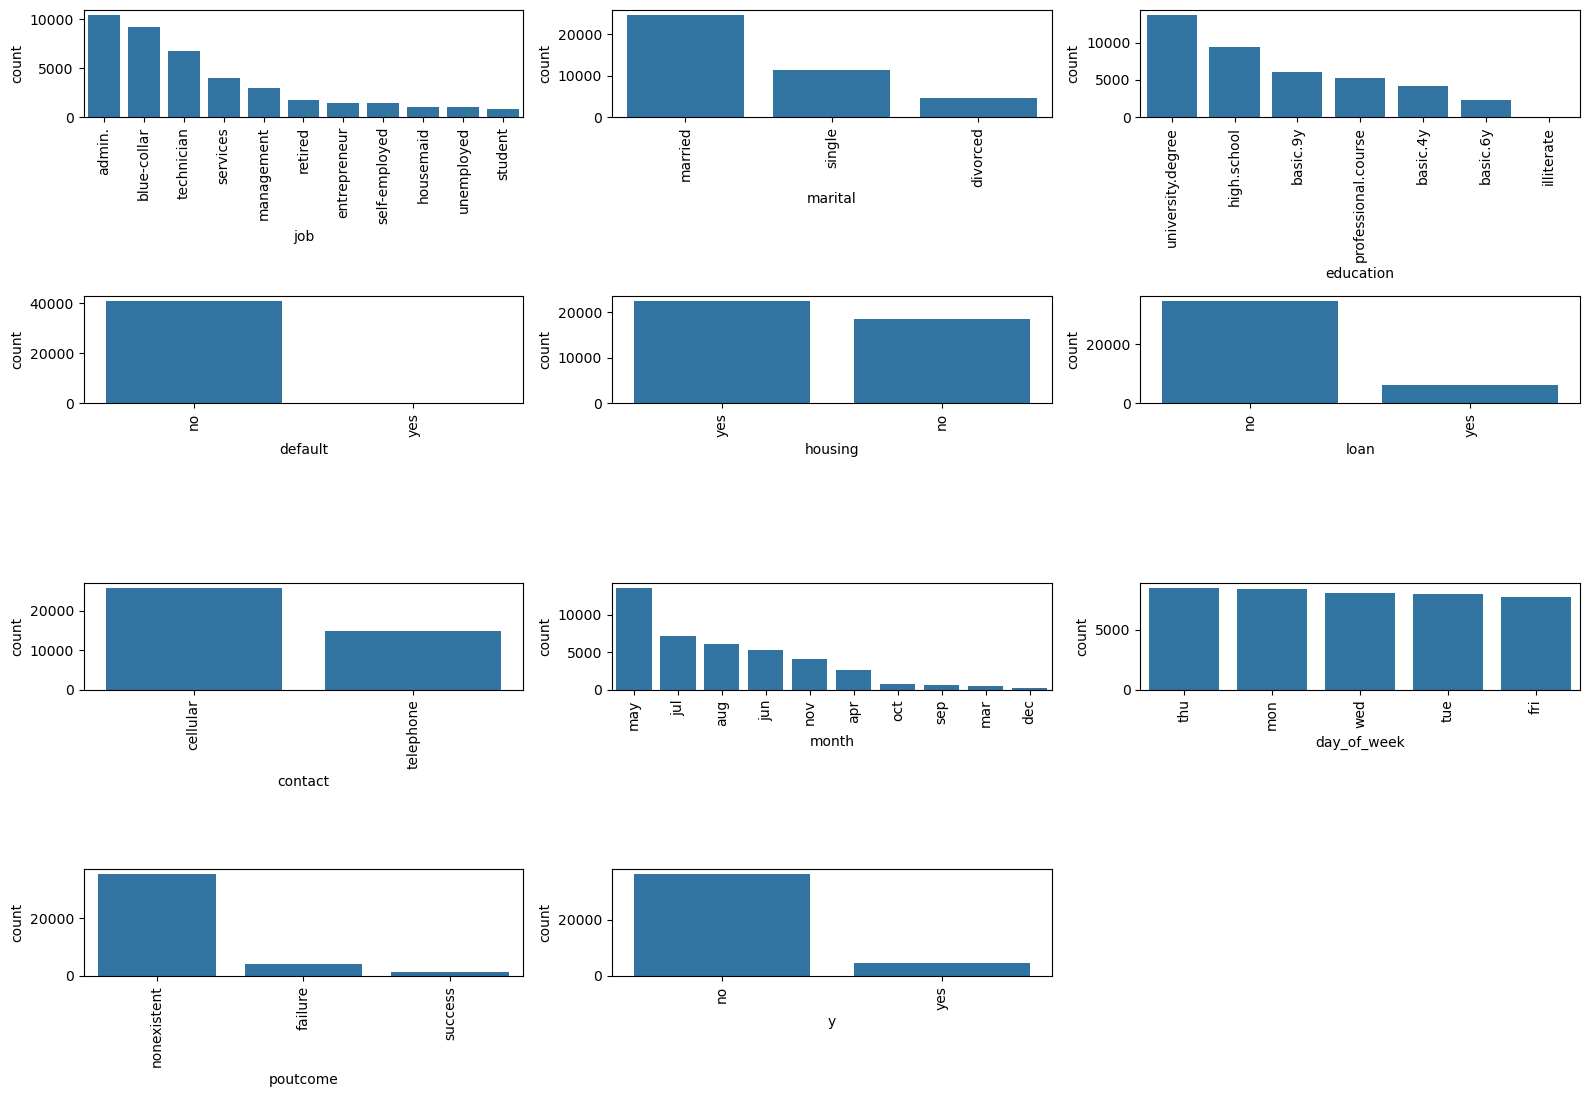

In [60]:
# Plotting the Count of Each Category in Categorical Features
plt.figure(figsize=(16, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 3, i)
    sns.countplot(x=column,order=df[column].value_counts().index,data=df)
    plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

##### **Observations:**

- **Categorical Features:** There are 10 categorical features, excluding the target variable.
- **Job:** Most people in the dataset work in administrative roles, followed by blue-collar workers and technicians. There are fewer students.
- **Marital Status:** More people in the dataset are married.
- **Education:** Most clients in this dataset are literate.
- **Month:** We have more data from May and less from December.
- **Loan and Housing:** There are more people with a house loan compared to those without a personal loan.
- **Poutcome:** Most of the outcomes are failures.
- **Default:** There are significantly more cases of "no" compared to "yes" in the default feature, so will drop this.

##### We can remove the 'duration' feature because it’s not used in this analysis.Also, we should remove the 'default' feature since over 99% of the values are 'no,' making it not very useful.

but we will make two models using duration and without using duration so lets make a copy of both 

In [64]:
# Dropping duration and default features.
df_duration=df.copy()
df_duration=df_duration.drop(columns=['default'])

In [65]:
# Dropping duration and default features.
df=df.drop(columns=['duration'])# without duration
df=df.drop(columns=['default'])

##### Since we’ve dropped the 'default' and 'duration' features, let’s read the  categorical  columns again.

In [67]:
categorical_columns=df.select_dtypes(include=['object']).columns


#### Bi-Variate Analysis for Categorical Features  

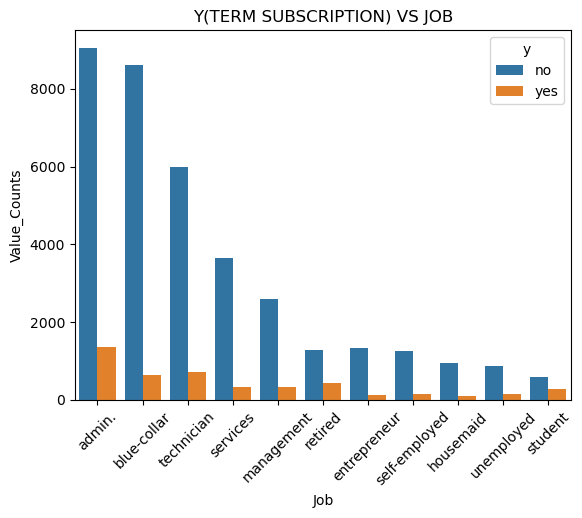

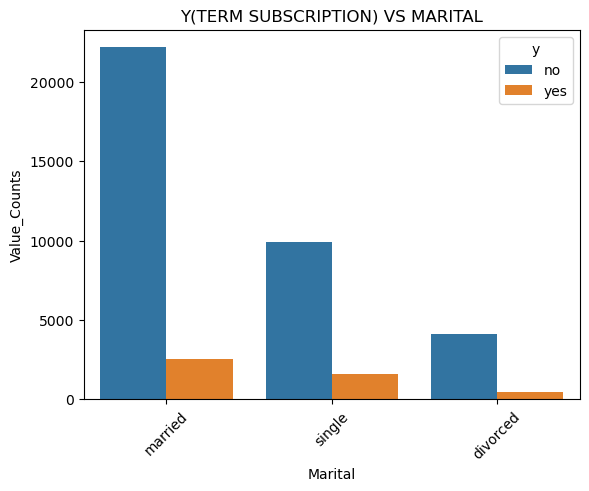

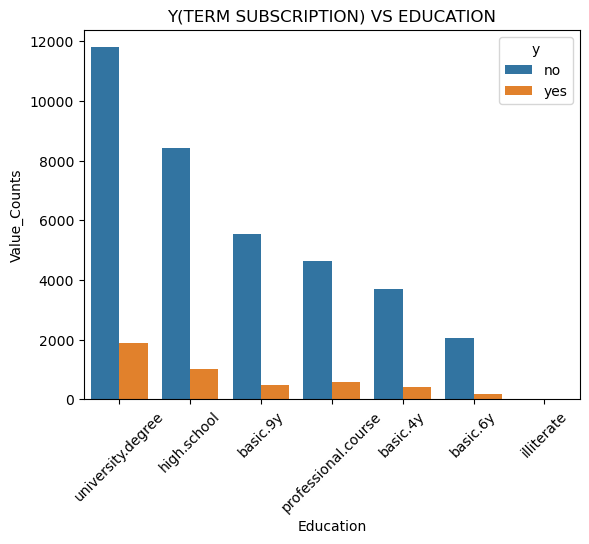

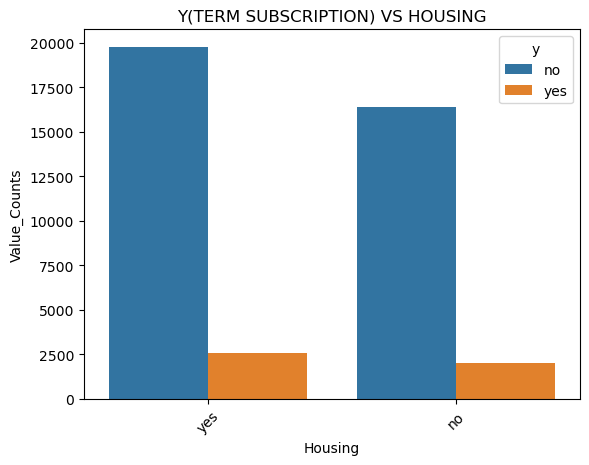

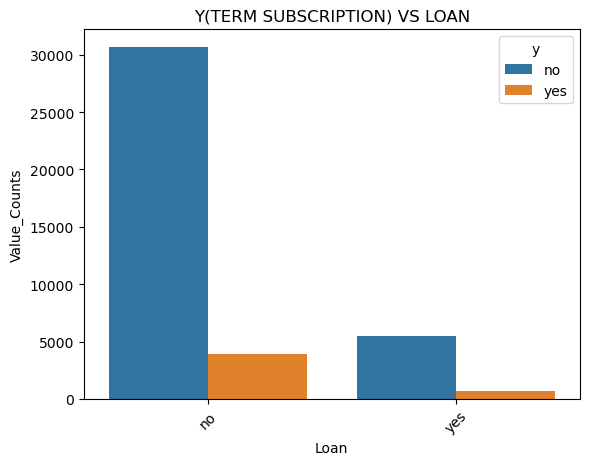

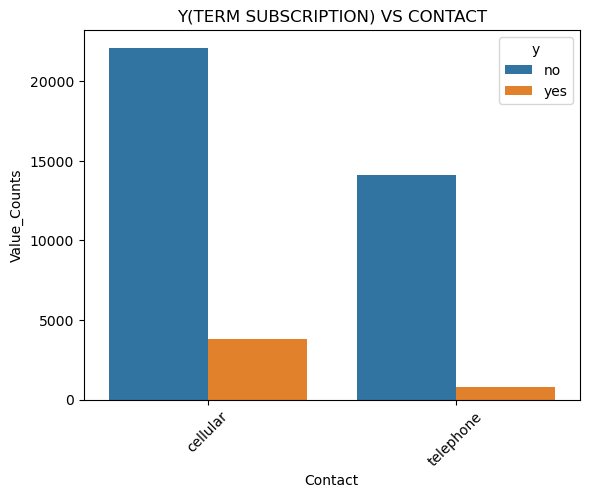

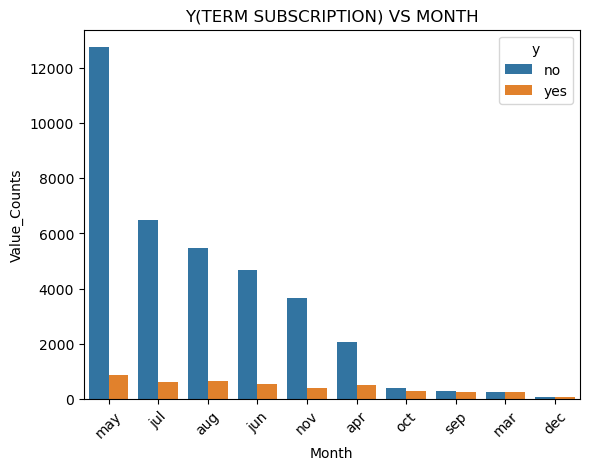

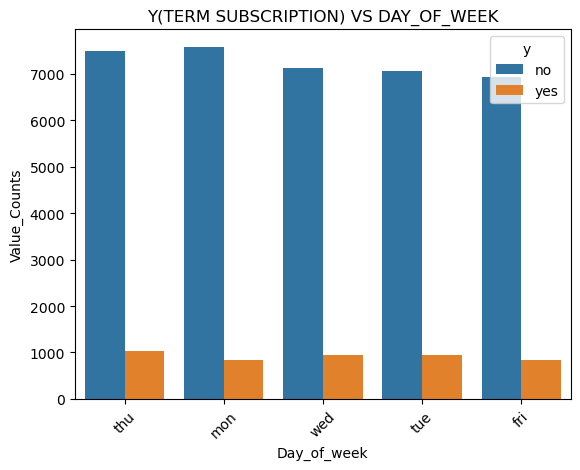

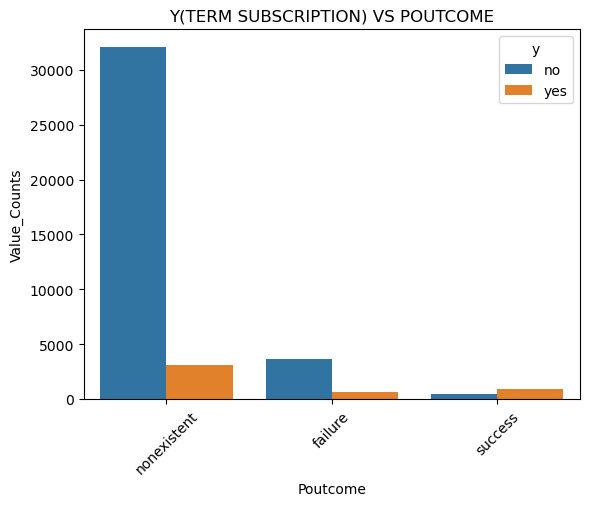

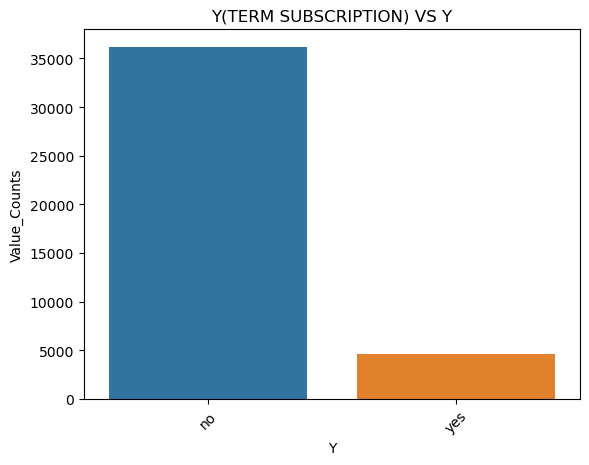

In [69]:
# lets see the realtion between categorical values and target variables
for i in categorical_columns:
    sns.countplot(x=i,hue='y', data=df,order=df[i].value_counts().index)
    plt.title(f'y(term subscription) Vs {i}'.upper())
    plt.ylabel('Value_Counts')
    plt.xlabel(i.capitalize())
    plt.xticks(rotation=45)
    plt.show()

In [70]:
for i in categorical_columns:
    # Grouping by 'y' and the categorical column 'i', then using size() to get the counts
    count_data = df.groupby(['y', i]).size().unstack()  
    
    # Calculate the percentage by dividing each count by the sum of counts across 'yes' and 'no' for each category
    percentage_data =(count_data.div(count_data.sum(axis=0), axis=1) * 100).round(2)

    print(f"Percentage breakdown for {i}:")
    print(percentage_data)
    print("\n")
    

Percentage breakdown for job:
job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no    87.03        93.13         91.53      89.97       88.77    74.72   
yes   12.97         6.87          8.47      10.03       11.23    25.28   

job  self-employed  services  student  technician  unemployed  
y                                                              
no           89.48     91.85    68.54       89.18       85.73  
yes          10.52      8.15    31.46       10.82       14.27  


Percentage breakdown for marital:
marital  divorced  married  single
y                                 
no          89.71    89.81   86.03
yes         10.29    10.19   13.97


Percentage breakdown for education:
education  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
y                                                                  
no            89.73     91.74     92.17        89.13       77.78   

##### **Observations:**

- **Job:** Even though many people work in administrative jobs, retirees are more interested in term deposits.
- **Marital Status:** Single people are more likely to sign up for term deposits compared to those who are married.
- **Education:** Most clients are literate, but those with less education (like illiterates) actually sign up for term deposits more, followed by those with university degrees.
- **Loan and Housing:** People with personal loans are less likely to sign up for term deposits compared to those with house loans. Overall, having a loan doesn’t seem to affect the likelihood of subscribing to term deposits much.
- **Contact Method:** Clients contacted by cell phone have a better chance of subscribing to term deposits compared to those contacted by telephone.
- **Month and Day of the Week:** There is more interest in term deposits in December, March, October, and September. Subscriptions happen most often on Thursdays and Tuesdays.
- **poutcome:** sucess rate of previouos marketing has resulted in more term deposits.

### lets explore numerical features

##### Let’s add a new column called y_numeric by converting the y column. This will help us see how the features individually affect the term deposit. We are adding this because y is currently categorical, and we need it in numeric form to identify patterns.

In [74]:
df['y_numeric'] = df['y'].replace({'yes': 1, 'no': 0}).astype(int)
df_duration['y_numeric'] = df_duration['y'].replace({'yes': 1, 'no': 0}).astype(int)

##### Since we’ve added the 'y_numeric'  features, let’s read the  numeric  columns again.

In [76]:
numeric_columns=df.select_dtypes(include=['number']).columns
numeric_columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'y_numeric'],
      dtype='object')

####  Univariate Analysis for Numerical Features

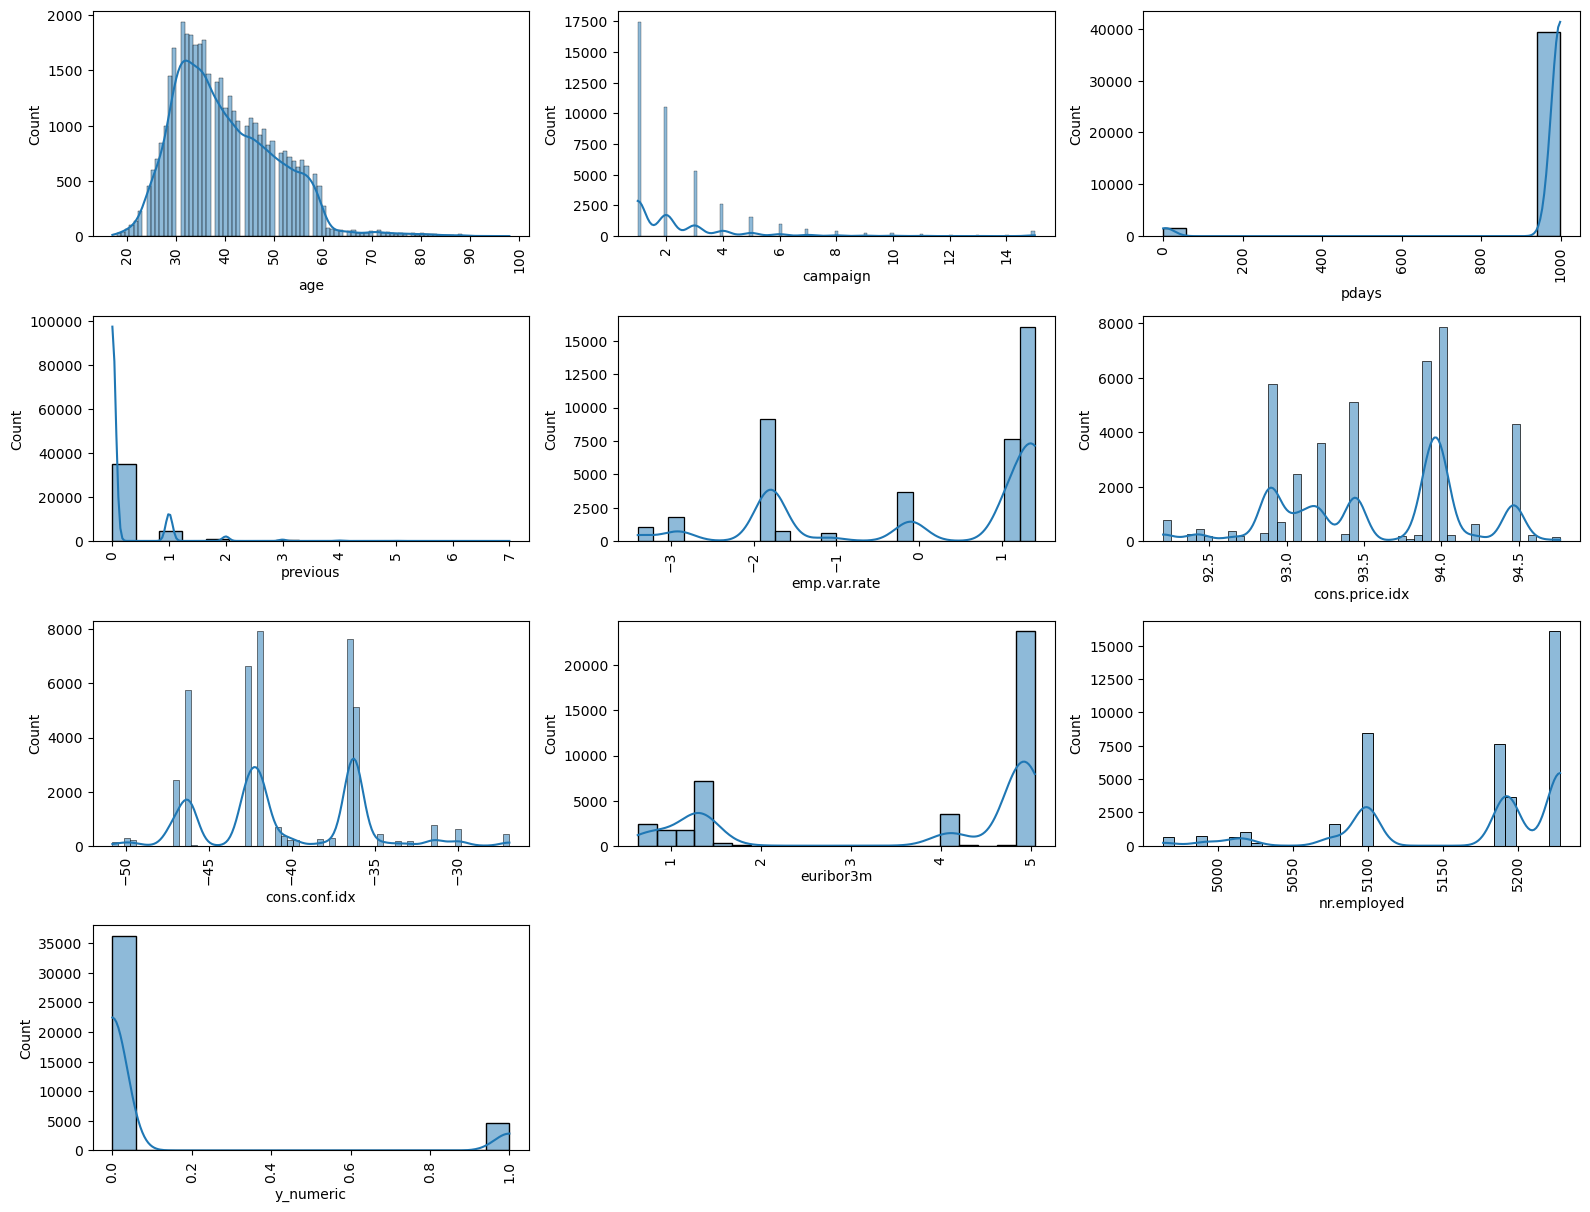

In [78]:
# plotting the histplot of each numeric in each numeric feature 
plt.figure(figsize=(16, 30))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 3, i)
    sns.histplot(df[column],kde=True)
    plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

##### **Observations:**

- **Numeric Features:** There are 9 numeric features, excluding the target variable.
- **Age:** Age is slightly right-skewed, but we can consider it to be normally distributed.
- The rest of the features are either right-skewed or left-skewed, which we will address if they impact performance, as mentioned earlier (handling skewness). 
- We also have outliers, which we dealt with previously, along with some data cleaning (refer to the section above).


#### Bi-Variate Analysis for Numeric Features  

##### Unlike categorical data, we can't use a countplot for numeric data since it contains integer and float values. Instead, we will use a heatmap(correlation plot) to visualize the relationships between the numeric features.

Text(120.58159722222221, 0.5, 'Variables')

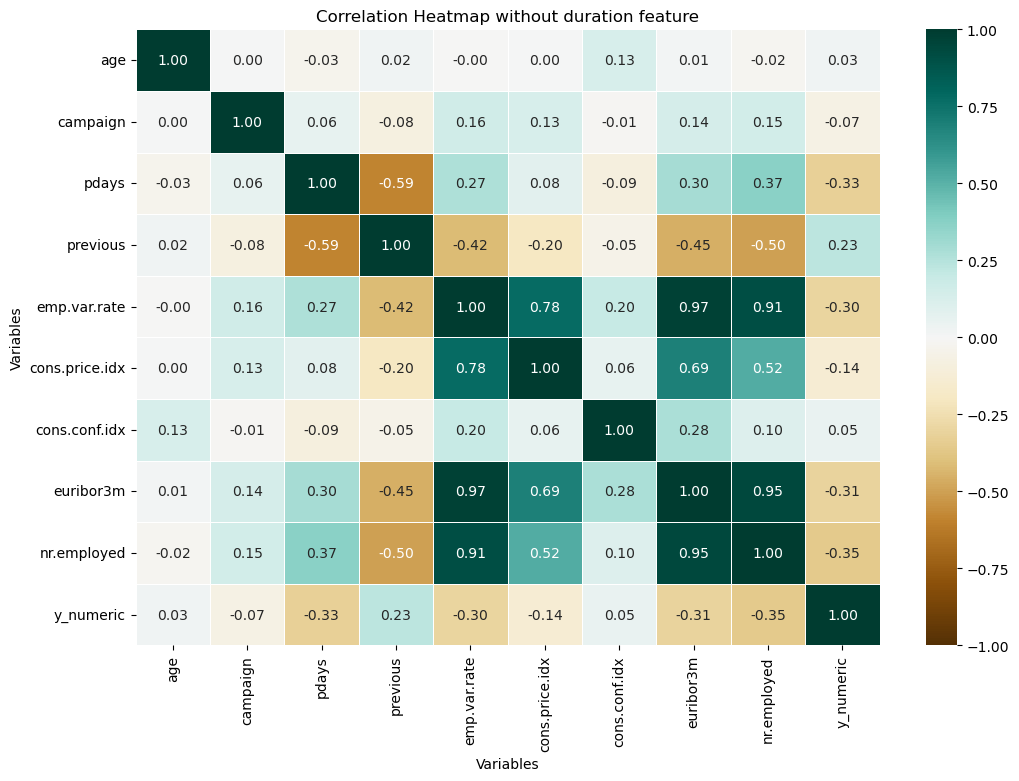

In [82]:
f,ax = plt.subplots(figsize=(12, 8))
# Creating the heatmap using seaborn's heatmap function
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap="BrBG",annot=True,fmt=".2f", linewidths=0.5, ax=ax,vmin=-1, vmax=1)#.figure.savefig("heatmap.png",dpi=300,bbox_inches='tight')
# Set the title and labels for the heatmap
ax.set_title('Correlation Heatmap without duration feature')
ax.set_xlabel('Variables')
ax.set_ylabel('Variables')

##### **Observations:**

- We can suggest that 'previous' might have a relationship with 'y', but overall, none of the two variables have a strong positive or negative relationship.

**Note:** Since we don't have a clear relationship, let's explore further to get a rough idea. We'll examine the patterns between the numerical values and the target variable.

##### campaign vs y

percentage of term deposit acceptance according to number of calls
y_numeric          0          1
campaign                       
1          86.991171  13.008829
2          88.508488  11.491512
3          89.214205  10.785795
4          90.635706   9.364294
5          92.433796   7.566204
6          92.339545   7.660455
7          93.890675   6.109325
8          95.939086   4.060914
9          93.862816   6.137184
10         95.045045   4.954955
11         93.181818   6.818182
12         97.580645   2.419355
13         95.505618   4.494382
14         98.550725   1.449275
15         98.496241   1.503759


Text(0.5, 1.0, 'campaign_vs_y')

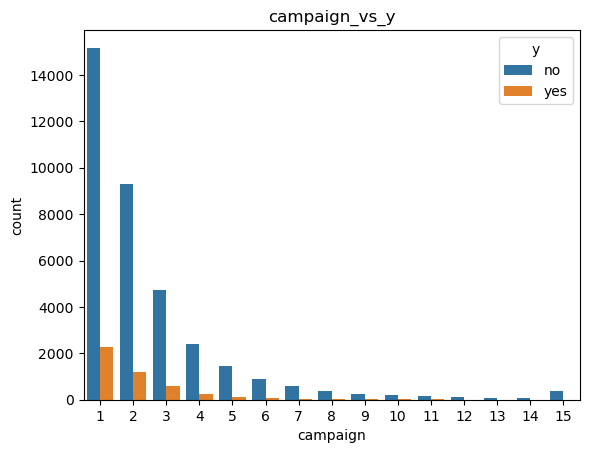

In [85]:
campaign_vs_y=df[['campaign','y_numeric']].groupby(['campaign','y_numeric']).size().unstack()
print('percentage of term deposit acceptance according to number of calls')
print(campaign_vs_y.div(campaign_vs_y.sum(axis=1),axis=0) * 100)
sns.countplot(x="campaign",hue='y' ,data=df)
plt.title('campaign_vs_y')

##### previous vs y

y_numeric           0          1
previous                        
0           91.157004   8.842996
1           78.814684  21.185316
2           53.918919  46.081081
3           40.654206  59.345794
4           45.714286  54.285714
5           27.777778  72.222222
6           40.000000  60.000000
7          100.000000        NaN


Text(0.5, 1.0, 'previous_vs_y')

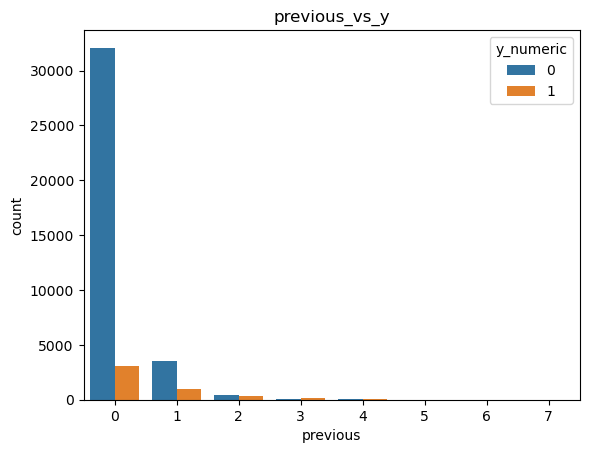

In [87]:
previous_vs_y=df[['previous','y_numeric']].groupby(['previous','y_numeric']).size().unstack()
print(previous_vs_y.div(previous_vs_y.sum(axis=1),axis=0) * 100)
sns.countplot(x="previous",hue='y_numeric' ,data=df)
plt.title('previous_vs_y')

##### **Observations:**

-  can say that more contacts do not necessarily lead to more term subscriptions.

##### pdays vs y

In [90]:
pdays_vs_y=df[['pdays','y_numeric']].groupby(['pdays','y_numeric']).size().unstack()
pdays_vs_y.dropna()

y_numeric,0,1
pdays,,
0,5.0,10.0
1,17.0,8.0
2,23.0,36.0
3,135.0,296.0
4,55.0,61.0
5,17.0,29.0
6,118.0,286.0
7,20.0,40.0
8,6.0,11.0


##### **Observations:**

-  We can say that most of the clients were not previously contacted.

##### age vs y

In [93]:
np.sort(df['age'].unique())

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 91, 92, 94, 95, 98], dtype=int64)

In [94]:
# Use pd.cut() to add an 'Age Group' column
df['Age Group'] = pd.cut(df['age'], bins=[17, 29, 44 ,64, 100], labels=['17-29', '30-44', '45-64','65+'])

y_numeric      0     1
Age Group             
17-29       4718   910
30-44      20268  2155
45-64      10847  1221
65+          344   305


<Axes: xlabel='Age Group', ylabel='count'>

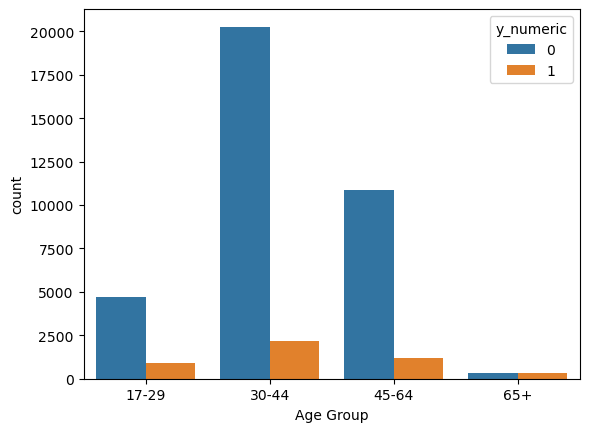

In [95]:
# plt.figure(figsize=(12, 8))
print(df[['Age Group','y_numeric']].groupby(['Age Group','y_numeric']).size().unstack())
sns.countplot(x="Age Group",hue='y_numeric' ,data=df)

In [96]:
age_group_campaign=df.groupby('Age Group').campaign.sum()
age_group_campaign

Age Group
17-29    13649
30-44    56348
45-64    30984
65+       1289
Name: campaign, dtype: int64

##### **Observations:**

-  We can say that people aged between 30 and 64 have fewer term deposits compared to other age groups.
-  Most of the calls were made to individuals aged between 30 and 64.

Text(120.58159722222221, 0.5, 'Variables')

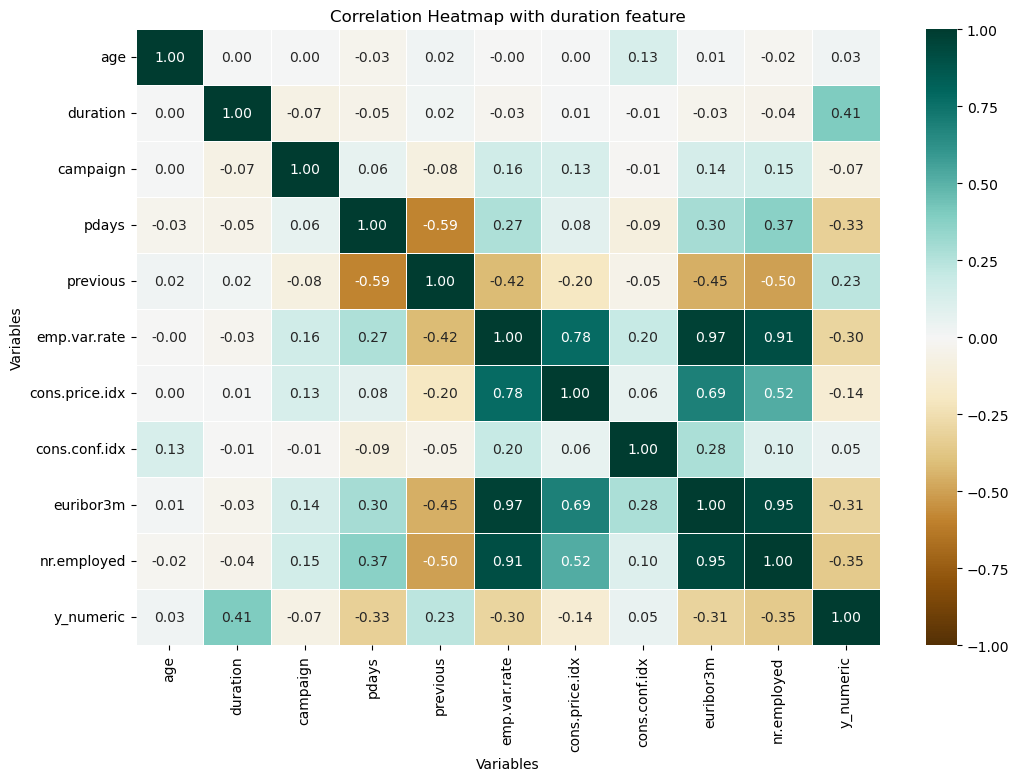

In [98]:
f,ax = plt.subplots(figsize=(12, 8))
# Creating the heatmap using seaborn's heatmap function
sns.heatmap(df_duration.select_dtypes(include=['number']).corr(), cmap="BrBG",annot=True,fmt=".2f", linewidths=0.5, ax=ax,vmin=-1, vmax=1)#.figure.savefig("heatmap.png",dpi=300,bbox_inches='tight')
# Set the title and labels for the heatmap
ax.set_title('Correlation Heatmap with duration feature')
ax.set_xlabel('Variables')
ax.set_ylabel('Variables')

# Modelling

## 1. Converting data
-  change all the data into numbers because machine learning algorithms can only work with numerical data. This step ensures that the data is ready to be processed by the models. Once the data is converted, we will clean and prepare it for training the models.

### 1.1 Removing Unnecessary Columns
- Before converting the data into numbers, we will delete the columns that were added earlier for visualization purposes during the exploratory data analysis (EDA) stage. This will be done for both versions of the dataset — the one with duration and the one without.

#### 1.1.1 Without Duration feature

In [103]:
# making a copy of data,so that we can revert back if we want.
df_clean=df.copy()

In [104]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'y_numeric', 'Age Group'],
      dtype='object')

In [105]:
# dropping all the extra columns
df_clean=df_clean.drop(columns=['y_numeric','Age Group'])

#### 1.1.2 With Duration feature

In [107]:
# making a copy of data,so that we can revert back if we want.
df_duration_clean=df_duration.copy()

In [108]:
df_duration_clean.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'y_numeric'],
      dtype='object')

In [109]:
# dropping all the extra columns
df_duration_clean=df_duration_clean.drop(columns=['y_numeric'])

### 1.2 One-hot encoding for modelling
-  convert all the categorical columns into numerical format using **one-hot encoding**.
-  For the target variable, use **label encoding** because one-hot encoding creates multiple columns, which we don’t need; we only need a single value for prediction.
- For the remaining categorical columns, we use one-hot encoding to prevent the model from assuming any order or hierarchy among the categories, creating separate columns for each category.

**Note:** One-hot encoding is used to turn categories into numbers in a way that avoids confusion for the machine learning model, even though it adds more columns to the data.


#### 1.2.1 Without Duration feature

In [112]:
# Label encode the target variable
label_encoder = LabelEncoder()
df_clean['y'] = label_encoder.fit_transform(df_clean['y'])  # 'yes' = 1, 'no' = 0

# Convert categorical variables to dummy variables (One-Hot Encoding)
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome']
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

#### 1.2.2 With Duration feature

In [114]:
# Label encode the target variable
label_encoder = LabelEncoder()
df_duration_clean['y'] = label_encoder.fit_transform(df_duration_clean['y'])  # 'yes' = 1, 'no' = 0

# Convert categorical variables to dummy variables (One-Hot Encoding)
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome']
df_duration_clean = pd.get_dummies(df_duration_clean, columns=categorical_cols, drop_first=True)

## 2.  Splitting the Data
In this step, we will divide the dataset into two parts: one for training the models and another for testing how well they work. The training part helps the models learn, while the testing part checks their performance on new data. This way, we can see if the models are good at making predictions.

#### 2.1 Without Duration feature

In [117]:
# Define features and target variable
X = df_clean.drop(columns=['y'])
y = df_clean['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.2 With Duration feature

In [119]:
# Define features and target variable
X_dur = df_duration_clean.drop(columns=['y'])
y_dur = df_duration_clean['y']

# Split data into training and testing sets
X_train_dur, X_test_dur, y_train_dur, y_test_dur = train_test_split(X_dur, y_dur, test_size=0.2, random_state=42)

## 3.Handling imbalance 
- To address the imbalance in the data, I will use SMOTE (Synthetic Minority Over-sampling Technique). While we could also use undersampling, I chose SMOTE because it generates synthetic examples of the minority class rather than removing instances from the majority class. This helps maintain more information in the dataset, leading to better model performance and more accurate predictions.


#### 3.1 Without Duration feature

In [122]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### 3.2 With Duration feature

In [124]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote_dur, y_train_smote_dur = smote.fit_resample(X_train_dur, y_train_dur)

## 4.Trying different models 
Since our problem involves predicting a binary outcome (yes or no) and we have imbalanced data, I have chosen the following models:-
- **Logistic Regression (linear):** A simple model that is easy to understand. It may not capture complex patterns well, so we will use it as a starting point.
- **Decision Tree (non-linear):** Handles both numeric and categorical values and helps identify important features, but it may overfit the data.
- **Random Forest (Ensemble):** Solves the overfitting issue in decision trees and manages imbalanced data by adjusting class weights.
- **XGBoost (Boosting):** Similar to Random Forest but generally more accurate, especially in dealing with complex relationships.

In [126]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

**Defintions:**
- **Accuracy:** The percentage of all predictions (both correct and incorrect) that the model got right.
- **Precision:** The percentage of correct positive predictions made by the model out of all positive predictions it made.
- **Recall:** The percentage of actual positives that were correctly identified by the model.
- **F1-Score:** A balance between precision and recall, showing how well the model performs on positive cases.
- **ROC AUC:** A measure of how well the model distinguishes between positive and negative cases, with a score closer to 1 indicating better performance.
- **Confusion Matrix:** A table that shows the counts of correct and incorrect predictions broken down by actual and predicted classes.

#### 4.1 Without Duration feature

In [129]:
# Logistic Regression
# We are standardizing the data for Logistic Regression because, while the model can work without it, standardization can improve its performance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model and training the model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train_smote)

# Evaluate the model's performance
print("Logistic Regression with SMOTE:")
evaluate_model(logreg, X_test_scaled, y_test)

Logistic Regression with SMOTE:
Accuracy: 0.8438
Precision: 0.3448
Recall: 0.4563
F1-Score: 0.3928
ROC AUC: 0.6741
Confusion Matrix:
[[6469  783]
 [ 491  412]]


In [130]:
# decision tree

# Initialize the Logistic Regression model and training the model
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_smote, y_train_smote)

# Evaluate the model's performance
print("Decision Tree with SMOTE:")
evaluate_model(dtree, X_test, y_test)

Decision Tree with SMOTE:
Accuracy: 0.8347
Precision: 0.3026
Recall: 0.3776
F1-Score: 0.3360
ROC AUC: 0.6346
Confusion Matrix:
[[6466  786]
 [ 562  341]]


In [131]:
# Random forest
# I tried using class weights to address the imbalance, and while the accuracy was high, the recall remained low. 
# That's why I switched back to using SMOTE for better performance in identifying positive cases.

# Initialize the Logistic Regression model and training the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Evaluate the model's performance
print("\nRandom Forest with Smote:")
evaluate_model(rf, X_test, y_test)


Random Forest with Smote:
Accuracy: 0.8853
Precision: 0.4805
Recall: 0.4363
F1-Score: 0.4573
ROC AUC: 0.6888
Confusion Matrix:
[[6826  426]
 [ 509  394]]


In [132]:
# XGBoost Classifier

# Initialize the Logistic Regression model and training the model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_smote, y_train_smote)

# Evaluate the model's performance
print("\nXGBoost with SMOTE:")
evaluate_model(xgb, X_test, y_test)


XGBoost with SMOTE:
Accuracy: 0.8865
Precision: 0.4852
Recall: 0.4186
F1-Score: 0.4495
ROC AUC: 0.6817
Confusion Matrix:
[[6851  401]
 [ 525  378]]


##### **Observations:**
- **Accuracy:** Both the Random Forest model and XGBoost performed well, correctly predicting around 88.5% of the cases.
- **Precision:** XGBoost was the best at correctly identifying positive cases, with about 48.5% of its positive predictions being accurate.
- **Recall:** The Random Forest model was better at finding actual positive cases, catching about 43.6% of them.
- **F1-Score:** Random Forest also balanced precision and recall the best, scoring 45.7% overall.
- **ROC AUC:** Random Forest showed the best ability to distinguish between the two classes, with a score of 0.6888.
 
**Conclusion:**
The Random Forest model seems to work the best among all the options we tried, providing a good balance of performance. The next step will be to fine-tune this model to make it even better.

#### 4.2 With Duration feature

In [135]:
# Logistic Regression
scaler = StandardScaler()
X_train_scaled_dur = scaler.fit_transform(X_train_smote_dur)
X_test_scaled_dur = scaler.transform(X_test_dur)
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled_dur, y_train_smote_dur)
print("Logistic Regression with SMOTE(duration):")
evaluate_model(logreg, X_test_scaled_dur, y_test_dur)

Logistic Regression with SMOTE(duration):
Accuracy: 0.8991
Precision: 0.5442
Recall: 0.5449
F1-Score: 0.5445
ROC AUC: 0.7440
Confusion Matrix:
[[6840  412]
 [ 411  492]]


In [136]:
# decision tree

# Initialize the Logistic Regression model and training the model
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_smote_dur, y_train_smote_dur)

# Evaluate the model's performance
print("Decision Tree with SMOTE(duration):")
evaluate_model(dtree, X_test_dur, y_test_dur)

Decision Tree with SMOTE(duration):
Accuracy: 0.8900
Precision: 0.5030
Recall: 0.5581
F1-Score: 0.5291
ROC AUC: 0.7447
Confusion Matrix:
[[6754  498]
 [ 399  504]]


In [137]:
# Random forest

# Initialize the Logistic Regression model and training the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote_dur, y_train_smote_dur)

# Evaluate the model's performance
print("\nRandom Forest with Smote(duration):")
evaluate_model(rf, X_test_dur, y_test_dur)


Random Forest with Smote(duration):
Accuracy: 0.9113
Precision: 0.5976
Recall: 0.6102
F1-Score: 0.6038
ROC AUC: 0.7795
Confusion Matrix:
[[6881  371]
 [ 352  551]]


In [138]:
# XGBoost Classifier

# Initialize the Logistic Regression model and training the model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_smote_dur, y_train_smote_dur)

# Evaluate the model's performance
print("\nXGBoost with SMOTE(duration):")
evaluate_model(xgb, X_test_dur, y_test_dur)


XGBoost with SMOTE(duration):
Accuracy: 0.9127
Precision: 0.6044
Recall: 0.6124
F1-Score: 0.6084
ROC AUC: 0.7812
Confusion Matrix:
[[6890  362]
 [ 350  553]]


##### **Observations:**
- **Accuracy:** Both the Random Forest model and XGBoost performed well, correctly predicting around 91% of the cases.
- **Precision:** XGBoost was the best at correctly identifying positive cases, with about 60.44% of its positive predictions being accurate.
- **Recall:** The XGBoost model was better at finding actual positive cases, catching about 61.24% of them.
- **F1-Score:**  XGBoost also balanced precision and recall the best, scoring 60.84% overall.
- **ROC AUC:** Random Forest and XGBoost showed the best ability to distinguish between the two classes, with a score of 0.7812 and 0.7795 repectively.
 
**Conclusion:**
The XGBoost model seems to work the best among all the options we tried, providing a good balance of performance. 

# Next Steps


1) Make a comparison of both models using the duration feature and without using the duration feature.
2) Now that we have seen the performance of each model, we will fine-tune the model for better performance. Finally, the selected model will be saved with tuned parameters.
3) A final presentation will be made regarding this entire process.